In [1]:
# Importing all necessary libraries
import itertools
import numpy as np
import os, glob
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import shuffle
from time import time

In [2]:
# Import dataset, get the shape of the data, and shuffle to reduce bias
path = "/Users/max/Desktop/capstone/news.csv"

all_files = glob.glob(os.path.join(path, "*.csv"))

all_df = []
for f in all_files:
    df = pd.read_csv(f, sep=',')
    df['label'] = f.split('/')[-1]
    all_df.append(df)
    
df = pd.concat(all_df, ignore_index=True, sort=True)

df = shuffle(df) # randomize dataset somewhat
print(df.shape)
df.head()



(44898, 5)


,date,label,subject,text,title
8737,"January 15, 2016",Fake.csv,News,"Earlier this week, as public outrage and media...",MI Gov. Dick Sends SEVEN National Guardsman T...
37032,"November 29, 2017",True.csv,worldnews,LONDON (Reuters) - Prime Minister Theresa May ...,Brexit campaigners accuse May of selling UK sh...
34667,"January 19, 2016",True.csv,politicsNews,"ALTOONA, Iowa (Reuters) - Iowa’s governor said...",Iowa governor urges caucus-goers to say 'No' t...
9054,18-Feb-18,Fake.csv,politics,Thank goodnesss Jeff Sessions is moving on fin...,DOJ’s JEFF SESSIONS Opens Investigation Into W...
7628,"March 8, 2016",Fake.csv,News,In a desperate bid to normalize the Republican...,New Republican SCOTUS Tactic: Who Needs 9 Jus...


In [3]:
# Change the labels to more human-friendly ‘REAL’ and ‘FAKE’ booleans.
df.loc[(df['label'] == 'Fake.csv') , ['label']] = 'FAKE'
df.loc[(df['label'] == 'True.csv') , ['label']] = 'REAL'
df.head()

,date,label,subject,text,title
8737,"January 15, 2016",FAKE,News,"Earlier this week, as public outrage and media...",MI Gov. Dick Sends SEVEN National Guardsman T...
37032,"November 29, 2017",REAL,worldnews,LONDON (Reuters) - Prime Minister Theresa May ...,Brexit campaigners accuse May of selling UK sh...
34667,"January 19, 2016",REAL,politicsNews,"ALTOONA, Iowa (Reuters) - Iowa’s governor said...",Iowa governor urges caucus-goers to say 'No' t...
9054,18-Feb-18,FAKE,politics,Thank goodnesss Jeff Sessions is moving on fin...,DOJ’s JEFF SESSIONS Opens Investigation Into W...
7628,"March 8, 2016",FAKE,News,In a desperate bid to normalize the Republican...,New Republican SCOTUS Tactic: Who Needs 9 Jus...


In [4]:
# Isolate the labels
labels = df.label
labels.head()

8737     FAKE
37032    REAL
34667    REAL
9054     FAKE
7628     FAKE
Name: label, dtype: object

In [5]:
# Split the dataset
# 80% of the data will be used to train our model and the rest 20% will serve as testing data
x_train,x_test,y_train,y_test=train_test_split(df['text'].values.astype('str'), labels, test_size=0.2, random_state=7)

In [6]:
#Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

In [7]:
# Fit & transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [8]:
#Initialize a CountVectorizer
count_vectorizer=CountVectorizer(stop_words='english')

# Fit & transform train set, transform test set
count_train=count_vectorizer.fit_transform(x_train) 
count_test=count_vectorizer.transform(x_test)

# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[:10])

# Get the feature names of `count_vectorizer` 
print(count_vectorizer.get_feature_names()[:10])

['00', '000', '0000', '00000017', '00004', '00007', '000270', '0005', '0009', '000938']
['00', '000', '0000', '00000017', '00004', '00007', '000270', '0005', '0009', '000938']


In [9]:
# Build a naive bayes classification model and fit training sets
t = time()

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(tfidf_train,y_train)

training_time = time() - t
print("train time: %0.3fs" % training_time)

train time: 0.115s


In [10]:
# Predict and calculate accuracy
y_pred=naive_bayes_classifier.predict(tfidf_test)

score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test,y_pred, average='weighted')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test,y_pred, average='weighted')
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,y_pred, average='weighted')
print('F1 score: %f' % f1)

Accuracy: 93.55%
Accuracy: 0.935523
Precision: 0.935517
Recall: 0.935523
F1 score: 0.935514


           pred:fake  pred:real
true:fake       4454        278
true:real        301       3947


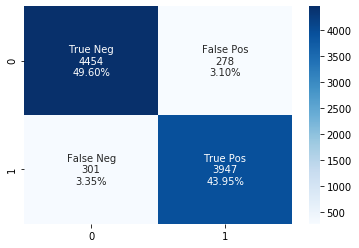

In [11]:
# Build confusion matrix
import seaborn as sns

import pandas as pd
cmtx = pd.DataFrame(
    confusion_matrix(y_test,y_pred, labels=['FAKE','REAL']), 
    index=['true:fake', 'true:real'], 
    columns=['pred:fake', 'pred:real']
)
print(cmtx)


cf_matrix = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [12]:
def predict_category(sentence):
    sentence_vector = tfidf_vectorizer.transform([sentence])
    prediction = naive_bayes_classifier.predict(sentence_vector)
    return prediction[0]

sent = '''
Trump says he will pressure states to reopen schools in fall
'''

predict_category(sent)

'REAL'

In [13]:
# Build a naive bayes classification model and fit training sets
t = time()

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(count_train,y_train)

training_time = time() - t
print("train time: %0.3fs" % training_time)

train time: 0.101s


In [14]:
# Predict and calculate accuracy
y_pred=naive_bayes_classifier.predict(count_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test,y_pred, average='weighted')
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test,y_pred, average='weighted')
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test,y_pred, average='weighted')
print('F1 score: %f' % f1)

Accuracy: 95.26%
Accuracy: 0.952561
Precision: 0.952579
Recall: 0.952561
F1 score: 0.952566


In [35]:
def predict_category(sentence):
    sentence_vector = count_vectorizer.transform([sentence])
    prediction = naive_bayes_classifier.predict(sentence_vector)
    return prediction[0]

sent = '''
A man who was revived from a drug overdose stole and crashed a police cruiser.
'''

predict_category(sent)

'FAKE'

In [ ]:
clf = MultinomialNB(alpha=0.1)
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(count_train, y_train)
    pred = nb_classifier.predict(count_test)
    score = accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

In [ ]:
clf = MultinomialNB(alpha=0.1)
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))